# Data Exploration
# First Look

In [1]:
import re

import pandas as pd
import tabulate

In [2]:
df20 = pd.read_csv('data/adjusted_vacancies_2020.csv')
df20.head(50)

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,True,False,NaN,NaN,NaN,NaN
1,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
2,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
3,False,Team Lead/Senior Data Analyst. Аналитик данных,3529-3529-prof,Сбер для экспертов,3,Екатеринбург,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
4,False,Data scientist (NLP) - Sberbank AI Lab,3529-3529-prof,Сбер для экспертов,1,Москва,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
5,False,Ведущий специалист по Machine learning (3D-алг...,NaN,NaN,1,Москва,False,False,250000.0,NaN,...,Адалиск,flexible,between3And6,full,True,False,337406.828743,NaN,250000.0,NaN
6,False,Аналитик ИСУ (Data Analyst),3529-3529-it,Сбер. IT,26,Воронеж,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
7,False,Аналитик данных,NaN,NaN,88,Казань,False,False,NaN,NaN,...,АК БАРС ДОМ,fullDay,between1And3,full,True,False,NaN,NaN,NaN,NaN
8,False,"Data Engineer, Global Music Company",NaN,NaN,26,Воронеж,False,False,NaN,NaN,...,DataArt,fullDay,between1And3,full,True,False,NaN,NaN,NaN,NaN
9,False,Разработчик Python / Data Scientist (NLP),NaN,NaN,4,Новосибирск,False,False,NaN,NaN,...,"Программный Продукт, ИТ-компания",fullDay,between1And3,full,True,False,NaN,NaN,NaN,NaN


In [3]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   premium                     897 non-null    bool   
 1   name                        897 non-null    object 
 2   department_id               187 non-null    object 
 3   department_name             187 non-null    object 
 4   area_id                     897 non-null    int64  
 5   area_name                   897 non-null    object 
 6   has_test                    897 non-null    bool   
 7   response_letter_required    897 non-null    bool   
 8   salary_from                 111 non-null    float64
 9   salary_to                   85 non-null     float64
 10  salary_currency             142 non-null    object 
 11  salary_gross                142 non-null    object 
 12  type_id                     897 non-null    object 
 13  employer_name               897 non

In [4]:
df24 = pd.read_csv('data/adjusted_vacancies_2024.csv')
df24.head()

,premium,name,has_test,response_letter_required,snippet,department_id,department_name,area_id,area_name,salary_from,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Специалист по работе с данными (Excel) / Анали...,False,False,{'requirement': 'Знание Excel на продвинутом у...,NaN,NaN,1,Москва,170000.0,...,ЦУГАМ,fullDay,between1And3,full,True,False,170000.0,170000.0,170000.0,170000.0
1,False,Data Analyst,False,False,{'requirement': 'Представление о работе BI инс...,NaN,NaN,2,Санкт-Петербург,60000.0,...,LoyaltyPlant,flexible,noExperience,full,False,False,60000.0,80000.0,60000.0,80000.0
2,False,"Аналитик по обработке данных (удалённо, проект...",False,False,"{'requirement': 'Терпеливы, любите копаться в ...",NaN,NaN,1,Москва,80000.0,...,ЛУКОЙЛ,remote,noExperience,full,False,False,80000.0,80000.0,80000.0,80000.0
3,False,Специалист по разметке данных для машинного об...,False,False,{'requirement': 'владение компьютером на уровн...,NaN,NaN,2,Санкт-Петербург,25000.0,...,Корда Групп,remote,noExperience,full,True,False,25000.0,NaN,25000.0,NaN
4,False,Младший аналитик данных,False,False,{'requirement': 'Умеешь четко формулировать и ...,NaN,NaN,1,Москва,NaN,...,Ростелеком - Центры обработки данных,fullDay,noExperience,full,True,False,NaN,NaN,NaN,NaN


In [5]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   premium                     2000 non-null   bool   
 1   name                        2000 non-null   object 
 2   has_test                    2000 non-null   bool   
 3   response_letter_required    2000 non-null   bool   
 4   snippet                     2000 non-null   object 
 5   department_id               616 non-null    object 
 6   department_name             616 non-null    object 
 7   area_id                     2000 non-null   int64  
 8   area_name                   2000 non-null   object 
 9   salary_from                 359 non-null    float64
 10  salary_to                   235 non-null    float64
 11  salary_currency             424 non-null    object 
 12  salary_gross                424 non-null    object 
 13  type_id                     2000 

In [6]:
df20.describe()

,area_id,salary_from,salary_to,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
count,897.000000,1.110000e+02,8.500000e+01,1.110000e+02,8.500000e+01,1.110000e+02,8.500000e+01
mean,48.751394,1.627685e+05,2.030953e+05,2.279115e+05,3.187968e+05,1.627685e+05,2.030953e+05
std,274.751283,1.994494e+05,2.671118e+05,2.674096e+05,3.545422e+05,1.994494e+05,2.671118e+05
min,1.000000,2.000000e+03,3.100000e+03,4.048882e+04,4.723696e+04,2.000000e+03,3.100000e+03
25%,1.000000,9.500000e+04,1.000000e+05,1.349627e+05,1.754516e+05,9.500000e+04,1.000000e+05
50%,1.000000,1.500000e+05,1.500000e+05,2.024441e+05,2.294366e+05,1.500000e+05,1.500000e+05
75%,2.000000,2.000000e+05,2.500000e+05,2.699255e+05,4.048882e+05,2.000000e+05,2.500000e+05
max,2734.000000,2.100000e+06,2.400000e+06,2.834217e+06,3.239106e+06,2.100000e+06,2.400000e+06


In [7]:
df24.describe()

,area_id,salary_from,salary_to,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
count,2000.000000,359.000000,235.000000,359.000000,2.350000e+02,359.000000,235.000000
mean,53.007500,114053.509749,166561.995745,123703.771965,1.958817e+05,114053.509749,166561.995745
std,312.262368,88800.223755,126401.269051,90410.318428,1.882280e+05,88800.223755,126401.269051
min,1.000000,50.000000,1400.000000,50.000000,1.000000e+04,50.000000,1400.000000
25%,1.000000,60000.000000,76522.500000,60000.000000,8.500000e+04,60000.000000,76522.500000
50%,1.000000,90000.000000,130000.000000,100000.000000,1.500000e+05,90000.000000,130000.000000
75%,2.000000,150000.000000,250000.000000,150000.000000,2.784000e+05,150000.000000,250000.000000
max,6011.000000,700000.000000,600000.000000,700000.000000,2.291488e+06,700000.000000,600000.000000


In [8]:
df = pd.concat([df20['salary_currency'].value_counts(), df24['salary_currency'].value_counts()], axis=1)
df.columns = ['2020', '2024']
df

,2020,2024
RUR,133,405
EUR,6,2
USD,3,17


# Statistical Analysis
## 1. Comparison between years (2020 -> 2024)

**Have the vacancy pool characteristics (number of vacancies, mean salary, expected experience, number of employer countries) changed over last 4 years?**

In [9]:
# check whether salary distributions of two datasets are similar

# take salary_from and salary_currency columns into one df
df20_sal_from = df20[['salary_from_rub', 'salary_currency']].dropna()
df24_sal_from = df24[['salary_from_rub', 'salary_currency']].dropna()
df20_sal_to = df20[['salary_to_rub', 'salary_currency']].dropna()
df24_sal_to = df24[['salary_to_rub', 'salary_currency']].dropna()
n20 = len(df20)
n24 = len(df24)

print("Percent of non-null rows in initial dataframes: ", round(len(df20_sal_from) / n20, 3),
      round(len(df24_sal_from) / n24, 3), round(len(df20_sal_to) / n20, 3), round(len(df24_sal_to) / n24, 3))

print("Number of non-null rows in initial dataframes: ", len(df20_sal_from), len(df24_sal_from), len(df20_sal_to),
      len(df24_sal_to))


Percent of non-null rows in initial dataframes:  0.124 0.179 0.095 0.117
Number of non-null rows in initial dataframes:  111 359 85 235


In [10]:
# rename salary_currency to initial_currency
df20_sal_from = df20_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_from = df24_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df20_sal_to = df20_sal_to.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_to = df24_sal_to.rename(columns={'salary_currency': 'initial_currency'})


### Hypothesis Testing

**Perform a statistical test to determine if the salary distributions of two datasets are the same. For this purpose, we will use the Kolmogorov-Smirnov test, where the null hypothesis is that the two distributions are the same. Let us define the significance level as 0.05, so if the p-value is less than 0.05, we will reject the null hypothesis and conclude that the two distributions are different.**
**As we can see, the p-values for both salary_from and salary_to are much less than 0.05, so we can reject the null hypothesis and conclude that the two distributions are different.**

**Now, let us perform a Mann-Whitney U test, which is a non-parametric test of the null hypothesis that two distributions are the same against an alternative hypothesis, especially that a particular distribution tends to have larger values than the other. One of the assumptions of the Mann-Whitney U test is that there is no much repetition of values in the datasets (no more than 10), let's check it:**

In [11]:
# check for repetition of values
print("Repetition of values in 2020 salary_from: ", df20_sal_from['salary_from_rub'].value_counts().max())
print("Repetition of values in 2024 salary_from: ", df24_sal_from['salary_from_rub'].value_counts().max())

Repetition of values in 2020 salary_from:  18
Repetition of values in 2024 salary_from:  35


As we can see, there is 18 repetitions of values in 2020 salary_from and 35 repetitions of values in 2024 salary_from, so we can not use Mann-Whitney U test. Now, let us perform a Kruskal test, which is a non-parametric test of the null hypothesis that the population median of all of the groups are equal against an alternative hypothesis, especially that at least one population median of the groups are different.
**As we can see, the p-values for both salary_from and salary_to are much less than 0.05, so we can reject the null hypothesis and conclude that at least one population median of the groups are different. In our case, the population median of two groups are different.**

In [12]:
from scipy.stats import kstest, kruskal
from tabulate import tabulate

tests = [
    ("Kolmogorov-Smirnov From", df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub']),
    ("Kolmogorov-Smirnov To", df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']),
    ("Kruskal From", df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub']),
    ("Kruskal To", df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub'])
]

results = []

for test_type, data1, data2 in tests:
    if test_type == "Kolmogorov-Smirnov From" or test_type == "Kolmogorov-Smirnov To":
        test_result = kstest(data1, data2)
    elif test_type == "Kruskal From" or test_type == "Kruskal To":
        test_result = kruskal(data1, data2)
    
    # p_value = round(test_result.pvalue, 8)
    # stat = round(test_result.statistic, 4)
    p_value = test_result.pvalue
    stat = test_result.statistic
    
    # Add results to the summary
    results.append([test_type, p_value, stat])

# Create a summary table
summary_table = []

for result in results:
    test_type, p_value, stat = result
    result_str = "same" if p_value > 0.05 else "different"
    summary_table.append([test_type, p_value, stat, result_str])

# Display the summary table
print("Summary of Statistical Tests")
print(tabulate(summary_table, headers=["Test", "p_value", "Stat","Result"], numalign="left", tablefmt="pretty"))


Summary of Statistical Tests
+-------------------------+------------------------+---------------------+-----------+
|          Test           |        p_value         |        Stat         |  Result   |
+-------------------------+------------------------+---------------------+-----------+
| Kolmogorov-Smirnov From | 3.3484043722646676e-17 | 0.4655825742176717  | different |
|  Kolmogorov-Smirnov To  | 1.504317430542744e-08  | 0.37947434292866083 | different |
|      Kruskal From       | 2.350328029368391e-16  |  67.28440840821102  | different |
|       Kruskal To        | 6.822023432791722e-08  | 29.114619838407616  | different |
+-------------------------+------------------------+---------------------+-----------+


# Conclusion
### How to prove that the salaries have decreased?

### Check for normality of the data with Kolmogorov-Smirnov test

In [13]:
# # check for normality with ks test
from scipy.stats import kstest, zscore
import pandas as pd

# Assuming you have DataFrames df20_sal_from, df24_sal_from, df20_sal_to, df24_sal_to

# Create a list of DataFrames
dataframes = [df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub'],
              df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']]

# Create a list of labels for the results table
labels = ["Salary from 20", "Salary from 24", "Salary to 20", "Salary to 24"]

# Create an empty DataFrame to store the results
results_table = pd.DataFrame(columns=['Test', 'KS Statistic', 'P-Value'])

# Loop through dataframes and labels
for df, label in zip(dataframes, labels):
    z_score = zscore(df)
    test_result = kstest(z_score, 'norm')
    p_value = round(test_result[1], 4)
    
    # Append results to the table
    # results_table = results_table.append({'Test': label, 'KS Statistic': test_result[0], 'P-Value': p_value}, ignore_index=True)
    results_table = pd.concat([results_table, pd.DataFrame({'Test': [label], 'KS Statistic': [test_result[0]], 'P-Value': [p_value]})],
                              ignore_index=True)

# Display the results table
print(results_table)



             Test  KS Statistic  P-Value
0  Salary from 20      0.268346   0.0000
1  Salary from 24      0.182100   0.0000
2    Salary to 20      0.243177   0.0001
3    Salary to 24      0.177214   0.0000


### Visulaization

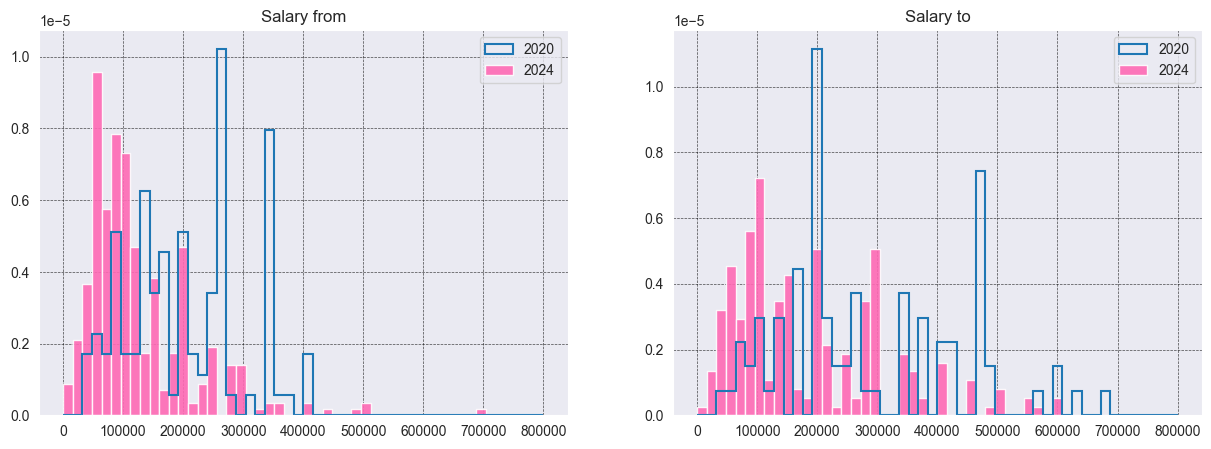

In [14]:
# put from and to salaries into one hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(df20_sal_from['salary_from_rub'], bins=50, range=(0, 800000), density=True, histtype='step', linewidth=1.5)
ax[0].hist(df24_sal_from['salary_from_rub'], bins=50, range=(0, 800000), alpha=0.9, color='hotpink', density=True,
           histtype='bar')
ax[0].set_title('Salary from')
ax[0].legend(['2020', '2024'])
# set a grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
# set colormap

ax[1].hist(df20_sal_to['salary_to_rub'], bins=50, range=(0, 800000), density=True, histtype='step', linewidth=1.5)
ax[1].hist(df24_sal_to['salary_to_rub'], bins=50, range=(0, 800000), alpha=0.9, color='hotpink', density=True)
ax[1].set_title('Salary to')
ax[1].legend(['2020', '2024'])
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
# make the same grid size for both plots


plt.show()

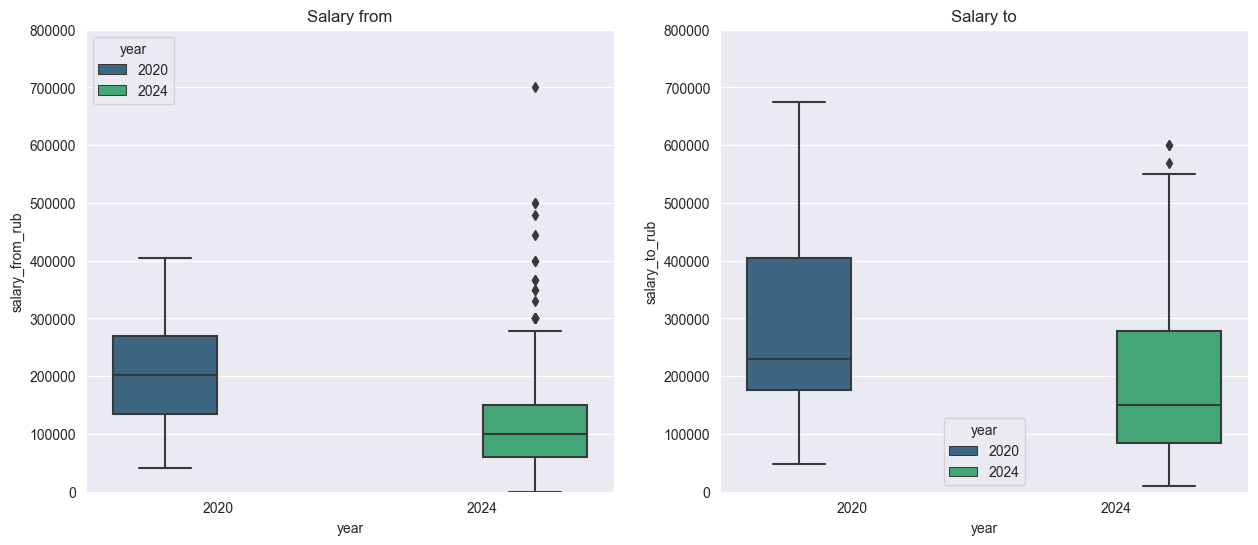

In [15]:
# boxplots for salary_from and salary_to
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

combined_2020 = pd.concat([df20_sal_from.assign(year='2020'), df20_sal_to.assign(year='2020')])
combined_2024 = pd.concat([df24_sal_from.assign(year='2024'), df24_sal_to.assign(year='2024')])

ax[0] = sns.boxplot(x='year', y='salary_from_rub', data=pd.concat([combined_2020, combined_2024]), ax=ax[0], palette='viridis', hue='year')
ax[1] = sns.boxplot(x='year', y='salary_to_rub', data=pd.concat([combined_2020, combined_2024]), ax=ax[1], palette='viridis', hue='year')
ax[0].set_title('Salary from')
ax[1].set_title('Salary to')
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

plt.show()

In [16]:
# describe salary_from and salary_to
# df20_sal_to.describe()
df = pd.concat([df20_sal_to.describe(), df24_sal_to.describe()], axis=1)
df.columns = ['2020', '2024']
df

,2020,2024
count,8.500000e+01,2.350000e+02
mean,3.187968e+05,1.958817e+05
std,3.545422e+05,1.882280e+05
min,4.723696e+04,1.000000e+04
25%,1.754516e+05,8.500000e+04
50%,2.294366e+05,1.500000e+05
75%,4.048882e+05,2.784000e+05
max,3.239106e+06,2.291488e+06


### Conclusion
Both mean and median have become smaller than in 2020 year. 

In [17]:
# TODO: compare to and from distributions

## 2. Compare salaries of specialists with different experience levels (2020 vs 2024)

### Visualizations

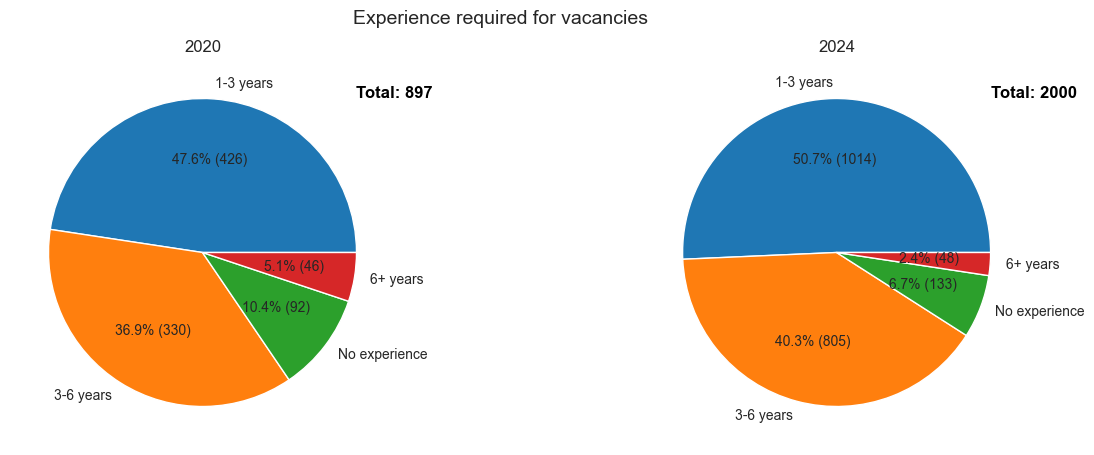

In [18]:
# draw a pie chart with percentages for 2020 and 2024 without Total row

total20 = df20['experience_id'].value_counts().sum()
total24 = df24['experience_id'].value_counts().sum()

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# rename noExperience to No experience, 1-3 to 1-3 years, 3-6 to 3-6 years and 6+ to 6+ years
df20_ = df20.copy()
df24_ = df24.copy()
df20_['experience_id'] = df20['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})
df24_['experience_id'] = df24['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})

# reindex the series {No experience: 0, 1-3 years: 1, 3-6 years: 2, 6+ years: 3}
df20_['experience_id'] = df20_['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)


def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}% ({absolute})"


ax[0].pie(df20_['experience_id'].value_counts(), labels=df20_['experience_id'].value_counts().index,
          autopct=lambda pct: func(pct, df20_['experience_id'].value_counts()), )

ax[1].pie(df24_['experience_id'].value_counts(), labels=df24_['experience_id'].value_counts().index,
          autopct=lambda pct: func(pct, df24_['experience_id'].value_counts()))

# add a total number of vacancies
ax[0].text(1, 1, f"Total: {total20}", fontsize=12, color='black', weight='bold')
ax[1].text(1, 1, f"Total: {total24}", fontsize=12, color='black', weight='bold')

# put a title
ax[0].set_title('2020')
ax[1].set_title('2024')

# add a title of the whole plot
fig.suptitle('Experience required for vacancies', fontsize=14)
plt.show()

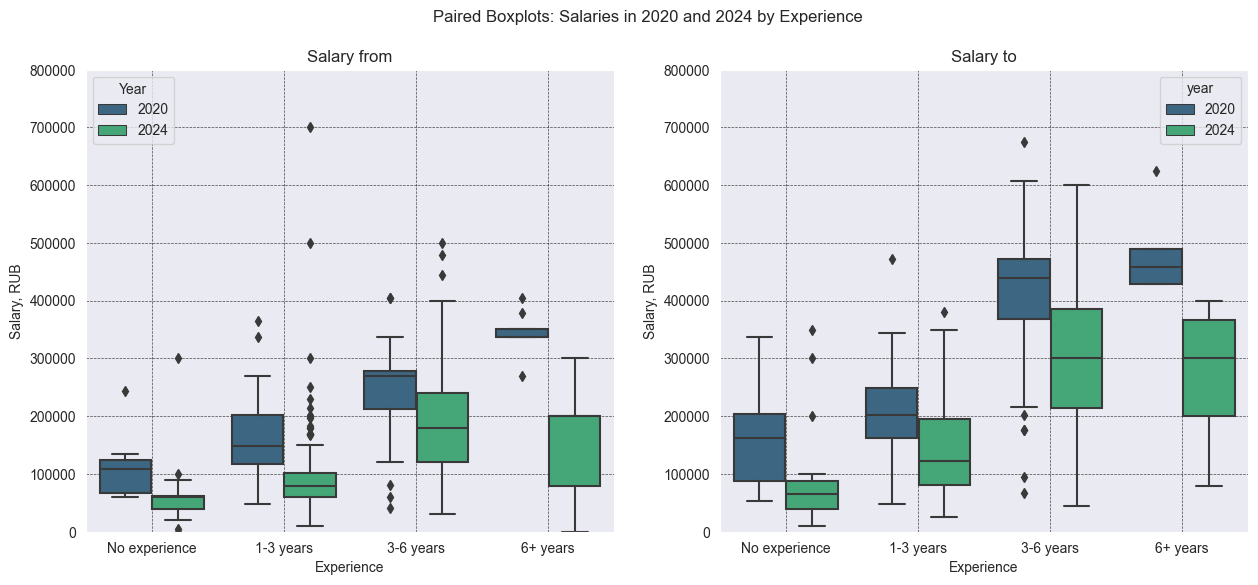

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine 'from' and 'to' data for 2020 and 2024
df_combined_2020 = pd.concat([df20_[['experience_id', 'salary_from_rub']].assign(year='2020'),
                              df20_[['experience_id', 'salary_to_rub']].assign(year='2020')])
df_combined_2024 = pd.concat([df24_[['experience_id', 'salary_from_rub']].assign(year='2024'),
                              df24_[['experience_id', 'salary_to_rub']].assign(year='2024')])

# Order the experience_id indexes
df_combined_2020['experience_id'] = df_combined_2020['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)
df_combined_2024['experience_id'] = df_combined_2024['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)

# Rename 'No experience' to 'No experience', '1-3' to '1-3 years', '3-6' to '3-6 years', '6+' to '6+ years'
df_combined_2020['experience_id'] = df_combined_2020['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})
df_combined_2024['experience_id'] = df_combined_2024['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})

# Create paired boxplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Make 2 boxplots appear on the same scale
ax[0] = sns.boxplot(x='experience_id', y='salary_from_rub', hue='year',
                    data=pd.concat([df_combined_2020, df_combined_2024]), ax=ax[0], palette='viridis')
ax[1] = sns.boxplot(x='experience_id', y='salary_to_rub', hue='year',
                    data=pd.concat([df_combined_2020, df_combined_2024]), ax=ax[1], palette='viridis')
ax[0].set_title('Salary from')
ax[1].set_title('Salary to')
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

# Add a title for the entire plot
fig.suptitle('Paired Boxplots: Salaries in 2020 and 2024 by Experience')

# Add a legend
ax[0].legend(title='Year', loc='upper left')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[0].set_ylabel('Salary, RUB')
ax[0].set_xlabel('Experience')
ax[1].set_ylabel('Salary, RUB')
ax[1].set_xlabel('Experience')

plt.show()


In [20]:
# add df20 and df24 to one dataframe with new column 'year'
df20_['year'] = 2020
df24_['year'] = 2024
df = pd.concat([df20_, df24_], axis=0)

df['experience_id'] = df['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)

df.groupby(['year', 'experience_id'])['salary_from_rub'].describe()

count           mean            std            min  \
year experience_id                                                       
2020 No experience   11.0  109074.425728   52032.703956   60733.229174   
     1-3 years       50.0  159606.926269   67348.370769   47236.956024   
     3-6 years       39.0  316406.500302  421931.905018   40488.819449   
     6+ years        11.0  343469.074695   32557.593369  269925.462994   
2024 No experience   52.0   58246.057692   39892.489395      50.000000   
     1-3 years      182.0   98134.176877   71182.310423   10000.000000   
     3-6 years      112.0  190905.088354   93004.527048   30000.000000   
     6+ years        13.0  164543.772938   90654.998652      90.000000   

                              25%            50%            75%           max  
year experience_id                                                             
2020 No experience   67481.365749  107970.185198  124840.526635  2.429329e+05  
     1-3 years      117754.983231  148459.004647  202444.097246  3.643994e+05  
     3-6 years      212203.608114  269925.462994  278023.226884  2.834217e+06  
     6+ years       337406.828743  337406.828743  350903.101893  4.040915e+05  
2024 No experience   40000.000000   60000.000000   61250.000000  3.000000e+05  
     1-3 years       60000.000000   80000.000000  102456.369128  7.000000e+05  
     3-6 years      120000.000000  180000.000000  240000.000000  5.000000e+05  
     6+ years        79000.000000  200000.000000  200000.000000  3.000000e+05

### Hypothesis Testing for Different Experience Levels (2020 vs 2024) between years

In [21]:
# statistical hypothesis testing for different levels of experience
from scipy.stats import kruskal    

result_table_kruskal_from = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kstest_from = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kruskal_to = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kstest_to = pd.DataFrame(columns=['Experience Level', 'p-value'])


# Loop through experience levels and perform both tests
for experience_level in df_combined_2020['experience_id'].unique():
    data_2020_from = df_combined_2020[df_combined_2020['experience_id'] == experience_level]['salary_from_rub']
    data_2024_from = df_combined_2024[df_combined_2024['experience_id'] == experience_level]['salary_from_rub']
    
    # drop NaNs
    data_2020 = data_2020_from.dropna()
    data_2024 = data_2024_from.dropna()
    stat = kruskal(data_2020, data_2024)
    stat_kstest = kstest(data_2020, data_2024)
    
    result_table_kruskal_from = pd.concat([result_table_kruskal_from, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat.pvalue, 4)], 'stat': [stat.statistic], "Result": ["same" if stat.pvalue > 0.05 else "different"]})],
                                       ignore_index=True)
    result_table_kstest_from = pd.concat([result_table_kstest_from, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat_kstest.pvalue, 4)], 'stat': [stat_kstest.statistic], "Result": ["same" if stat_kstest.pvalue > 0.05 else "different"]})], ignore_index=True)
    
    data_2020_to = df_combined_2020[df_combined_2020['experience_id'] == experience_level]['salary_to_rub']
    data_2024_to = df_combined_2024[df_combined_2024['experience_id'] == experience_level]['salary_to_rub']
    
    # drop NaNs
    data_2020 = data_2020_to.dropna()
    data_2024 = data_2024_to.dropna()
    stat = kruskal(data_2020, data_2024)
    stat_kstest = kstest(data_2020, data_2024)
    
    result_table_kruskal_to = pd.concat([result_table_kruskal_to, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat.pvalue, 4)], 'stat': [stat.statistic], "Result": ["same" if stat.pvalue > 0.05 else "different"]})],
                                       ignore_index=True)
    result_table_kstest_to = pd.concat([result_table_kstest_to, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat_kstest.pvalue, 4)], 'stat': [stat_kstest.statistic], "Result": ["same" if stat_kstest.pvalue > 0.05 else "different"]})], ignore_index=True)

# Display the result tables
from tabulate import tabulate
print("Kruskal Test Results From:")
print(tabulate(result_table_kruskal_from, headers="keys", tablefmt="pretty"))
print("Kolmogorov-Smirnov Test Results From:")
print(tabulate(result_table_kstest_from, headers="keys", tablefmt="pretty"))
print("Kruskal Test Results To:")
print(tabulate(result_table_kruskal_to, headers="keys", tablefmt="pretty"))
print("Kolmogorov-Smirnov Test Results To:")
print(tabulate(result_table_kstest_to, headers="keys", tablefmt="pretty"))


Kruskal Test Results From:
+---+------------------+---------+--------------------+-----------+
|   | Experience Level | p-value |        stat        |  Result   |
+---+------------------+---------+--------------------+-----------+
| 0 |     6+ years     |   0.0   | 17.099697094349505 | different |
| 1 |    1-3 years     |   0.0   | 41.040923064912874 | different |
| 2 |    3-6 years     |   0.0   | 16.837236961847008 | different |
| 3 |  No experience   |   0.0   | 17.453508134365904 | different |
+---+------------------+---------+--------------------+-----------+
Kolmogorov-Smirnov Test Results From:
+---+------------------+---------+--------------------+-----------+
|   | Experience Level | p-value |        stat        |  Result   |
+---+------------------+---------+--------------------+-----------+
| 0 |     6+ years     |   0.0   | 0.9230769230769231 | different |
| 1 |    1-3 years     |   0.0   | 0.5751648351648352 | different |
| 2 |    3-6 years     |   0.0   | 0.52472527472527

### Probably some other statistical techniques should be used for this data (jackknife, bootstrap, etc.)


## 3. Junior positions and Internships vs. others
Comparing percents and of junior and internship positions in 2020 and 2024. (How junior and internships position are needed in 2020 and 2024?)
What terms and offers of employment are suggested for Junior developers and Interns nowadays and how does they differ from higher level positions?

Does junior and internship positions require no experience?
How to define Junior position and Internship? Where is the line between Intern, Junior, Middle?

In [22]:
import re

words_to_match_int = ['intern', 'стажер', 'стажёр', 'trainee', 'практикант']
words_to_match_jun = ['junior', 'джуниор', 'младший', 'jun']
words_to_match_mid = ['middle', 'средний', 'mid']
words_to_match_sen = ['senior', 'старший', 'sen']
words_to_match_lead = ['lead', 'лидер', 'руководитель', 'ведущий']

def pattern(words_to_match):
    return '|'.join(rf'\b{re.escape(word)}\b' for word in words_to_match)

df20['int'] = df20['name'].str.contains(pattern(words_to_match_int), case=False)
df24['int'] = df24['name'].str.contains(pattern(words_to_match_int), case=False)

df20['jun'] = df20['name'].str.contains(pattern(words_to_match_jun), case=False)
df24['jun'] = df24['name'].str.contains(pattern(words_to_match_jun), case=False)

df20['mid'] = df20['name'].str.contains(pattern(words_to_match_mid), case=False)
df24['mid'] = df24['name'].str.contains(pattern(words_to_match_mid), case=False)

df20['sen'] = df20['name'].str.contains(pattern(words_to_match_sen), case=False)
df24['sen'] = df24['name'].str.contains(pattern(words_to_match_sen), case=False)

df20['lead'] = df20['name'].str.contains(pattern(words_to_match_lead), case=False)
df24['lead'] = df24['name'].str.contains(pattern(words_to_match_lead), case=False)


df20_int = df20['int'].value_counts()
df24_int = df24['int'].value_counts()
df20_jun = df20['jun'].value_counts()
df24_jun = df24['jun'].value_counts()
df20_mid = df20['mid'].value_counts()
df24_mid = df24['mid'].value_counts()
df20_sen = df20['sen'].value_counts()
df24_sen = df24['sen'].value_counts()
df20_lead = df20['lead'].value_counts()
df24_lead = df24['lead'].value_counts()

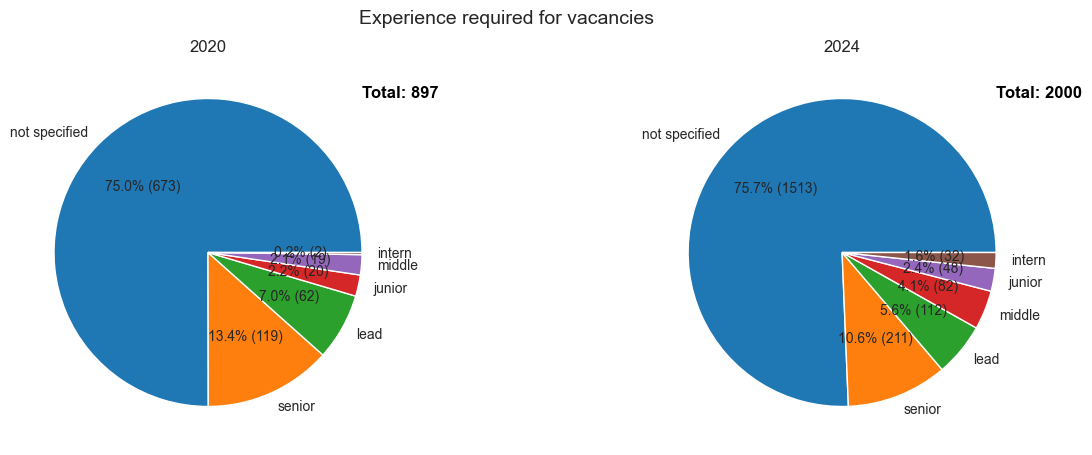

In [23]:
# draw a pie chart with percentages for 2020 and 2024 adding "not specified" row

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# add categories to the dataframes from df_int, df_jun, df_mid, df_sen, df_lead
df20['experience_level'] = 'not specified'
df24['experience_level'] = 'not specified'
df20.loc[df20['int'], 'experience_level'] = 'intern'
df24.loc[df24['int'], 'experience_level'] = 'intern'
df20.loc[df20['jun'], 'experience_level'] = 'junior'
df24.loc[df24['jun'], 'experience_level'] = 'junior'
df20.loc[df20['mid'], 'experience_level'] = 'middle'
df24.loc[df24['mid'], 'experience_level'] = 'middle'
df20.loc[df20['sen'], 'experience_level'] = 'senior'
df24.loc[df24['sen'], 'experience_level'] = 'senior'
df20.loc[df20['lead'], 'experience_level'] = 'lead'
df24.loc[df24['lead'], 'experience_level'] = 'lead'

# reindex the series {not specified: 0, intern: 1, junior: 2, middle: 3, senior: 4, lead: 5}
df20['experience_level'] = df20['experience_level'].astype('category').cat.reorder_categories(
    ['not specified', 'intern', 'junior', 'middle', 'senior', 'lead'], ordered=True)
df24['experience_level'] = df24['experience_level'].astype('category').cat.reorder_categories(
    ['not specified', 'intern', 'junior', 'middle', 'senior', 'lead'], ordered=True)

# create pie charts
ax[0].pie(df20['experience_level'].value_counts(), labels=df20['experience_level'].value_counts().index,
          autopct=lambda pct: func(pct, df20['experience_level'].value_counts()), )

ax[1].pie(df24['experience_level'].value_counts(), labels=df24['experience_level'].value_counts().index,
            autopct=lambda pct: func(pct, df24['experience_level'].value_counts()))

# add a total number of vacancies
ax[0].text(1, 1, f"Total: {total20}", fontsize=12, color='black', weight='bold')
ax[1].text(1, 1, f"Total: {total24}", fontsize=12, color='black', weight='bold')

# put a title
ax[0].set_title('2020')
ax[1].set_title('2024')

# add a title of the whole plot
fig.suptitle('Experience required for vacancies', fontsize=14)
plt.show()

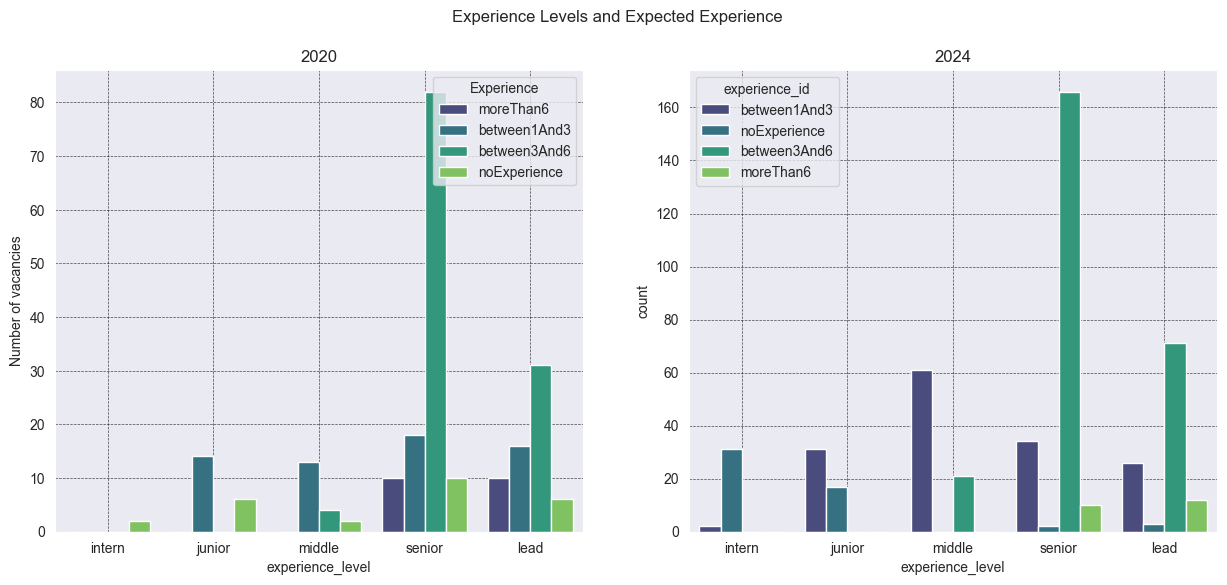

In [24]:
# plot grid of experience levels and expected experience
import seaborn as sns
import matplotlib.pyplot as plt

# subplots for 2020 and 2024, each of them is pairplot of experience levels and expected experience without not specified
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# remove not specified
df20['experience_level'] = df20['experience_level'].cat.remove_categories('not specified')
df24['experience_level'] = df24['experience_level'].cat.remove_categories('not specified')

# Make 2 pairplots appear on the same scale
ax[0] = sns.countplot(x='experience_level', hue='experience_id', data=df20, ax=ax[0], palette='viridis')
ax[1] = sns.countplot(x='experience_level', hue='experience_id', data=df24, ax=ax[1], palette='viridis')
ax[0].set_title('2020')
ax[1].set_title('2024')

# Add a title for the entire plot
fig.suptitle('Experience Levels and Expected Experience')

# Add a legend
ax[0].legend(title='Experience', loc='upper right')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[0].set_ylabel('Number of vacancies')

plt.show()

Москва                             511
Санкт-Петербург                    164
Новосибирск                         32
Краснодар                           25
Екатеринбург                        23
Нижний Новгород                     22
Воронеж                             15
Казань                              15
Ростов-на-Дону                       8
Томск                                8
Самара                               6
Саратов                              5
Пермь                                5
Кемерово                             4
Иннополис                            4
Волгоград                            4
Сочи                                 4
Владивосток                          2
Пенза                                2
Подольск (Московская область)        2
Красноярск                           2
Омск                                 2
Набережные Челны                     2
Рязань                               2
Ижевск                               2
Тверь                    

C:\Users\Bod\AppData\Local\Temp\ipykernel_7872\2504426343.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5_20['area_name'] = df_top5_20['area_name'].astype('category').cat.reorder_categories(
C:\Users\Bod\AppData\Local\Temp\ipykernel_7872\2504426343.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5_24['area_name'] = df_top5_24['area_name'].astype('category').cat.reorder_categories(


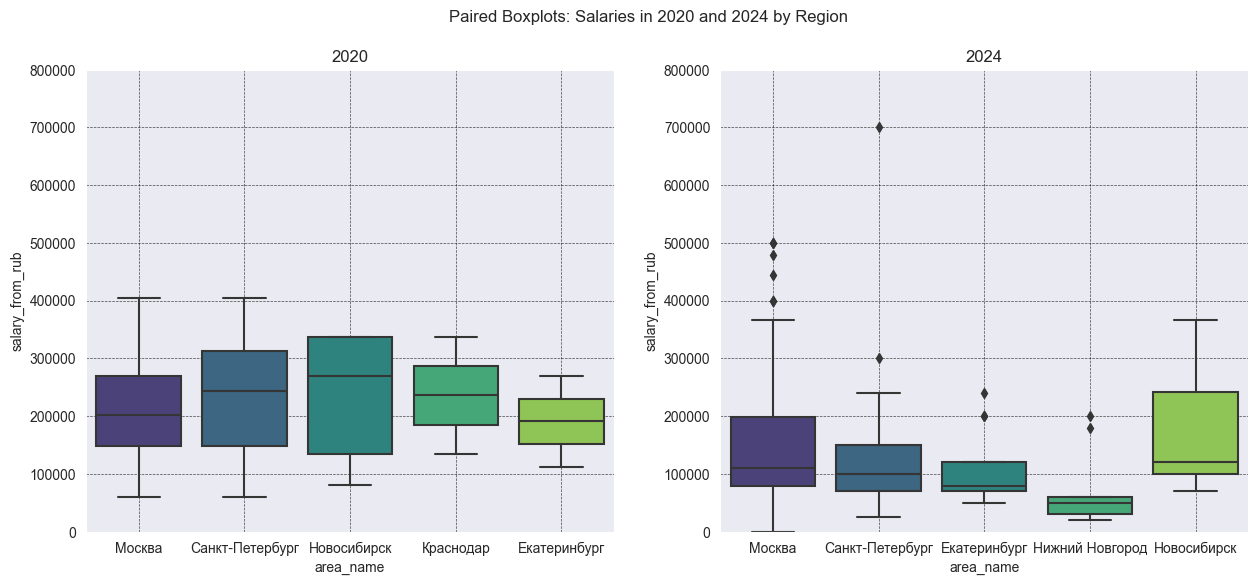

In [25]:
# explore for regions and salaries correlation
print(df20['area_name'].value_counts())
print(df24['area_name'].value_counts())

# paired boxplots for salaries for top 5 regions by number of vacancies
df_top5_20 = df20[df20['area_name'].isin(df20['area_name'].value_counts().head(5).index)]
df_top5_24 = df24[df24['area_name'].isin(df24['area_name'].value_counts().head(5).index)]

# sort by number of vacancies
df_top5_20['area_name'] = df_top5_20['area_name'].astype('category').cat.reorder_categories(
    df_top5_20['area_name'].value_counts().index, ordered=True)
df_top5_24['area_name'] = df_top5_24['area_name'].astype('category').cat.reorder_categories(
    df_top5_24['area_name'].value_counts().index, ordered=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0] = sns.boxplot(x='area_name', y='salary_from_rub', data=df_top5_20, ax=ax[0], palette='viridis')
ax[1] = sns.boxplot(x='area_name', y='salary_from_rub', data=df_top5_24, ax=ax[1], palette='viridis')
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

ax[0].set_title('2020')
ax[1].set_title('2024')

# Add a title for the entire plot
fig.suptitle('Paired Boxplots: Salaries in 2020 and 2024 by Region')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)

plt.show()

In [33]:
dataframes = [df20[df20['salary_from_rub'].notna()], df24[df24['salary_from_rub'].notna()]]

# print top 5 regions and number of values
for df in dataframes:
    print(df['area_name'].value_counts().head(5))

Москва             53
Санкт-Петербург    25
Новосибирск         5
Самара              3
Пермь               3
Name: area_name, dtype: int64
Москва             168
Санкт-Петербург     47
Екатеринбург        13
Новосибирск         12
Владивосток         10
Name: area_name, dtype: int64


**As we can see, for both years the number of vacancies with salary indication has acceptable values, perhaps only for Moscow (Москва) and St. Petersburg (Санкт-Петербург). So, we propose to test the hypothesis that the salaries in Moscow and St. Petersburg are different from the salaries in other regions.**

In [53]:
from scipy.stats import mannwhitneyu

labels = ["2020", "2024"]

# Create an empty DataFrame to store the results
results_table = pd.DataFrame(columns=['Year', 'Region', 'p-value'])

# Loop through dataframes and labels
for df, label in zip(dataframes, labels):
    # take only Москва and Санкт-Петербург
    df_moscow = df[df['area_name'] == 'Москва']
    df_spb = df[df['area_name'] == 'Санкт-Петербург']
    df_other_but_moscow = df[df['area_name'] != 'Москва']
    df_other_but_spb = df[df['area_name'] != 'Санкт-Петербург']

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(df_moscow['salary_from_rub'], df_other_but_moscow['salary_from_rub'])
    results_table = pd.concat([results_table, pd.DataFrame({'Year': [label], 'Region': ['Москва'], 'p-value': [p_value]})],
                              ignore_index=True)

    stat, p_value = mannwhitneyu(df_spb['salary_from_rub'], df_other_but_spb['salary_from_rub'])
    results_table = pd.concat([results_table, pd.DataFrame({'Year': [label], 'Region': ['Санкт-Петербург'], 'p-value': [p_value]})],
                              ignore_index=True)

# Display the results table
print("Mann-Whitney U Test Results")
print(tabulate(results_table, headers="keys", tablefmt="pretty"))

Mann-Whitney U Test Results
+---+------+-----------------+-----------------------+
|   | Year |     Region      |        p-value        |
+---+------+-----------------+-----------------------+
| 0 | 2020 |     Москва      |  0.23008665096624392  |
| 1 | 2020 | Санкт-Петербург |  0.18160667208945602  |
| 2 | 2024 |     Москва      | 3.300436751398453e-07 |
| 3 | 2024 | Санкт-Петербург |  0.4493886158509205   |
+---+------+-----------------+-----------------------+


**We can see that the p-value is less than 0.05 only for Moscow in 2024 year, so we can reject the null hypothesis and conclude that the salaries in Moscow are different from the salaries in other regions.
There is one problem appears from this fact: Since the number of vacancies from Moscow is much higher than from other regions, the salaries from Moscow have a significant impact on the overall distribution of salaries, so maybe it is better to compare the salaries in Moscow and St. Petersburg with the salaries in other regions, to see better the difference in salaries for Saint Petersburg as "the second capital" of Russia. So we propose to compare the salaries in St. Petersburg with the salaries in other regions but Moscow and St. Petersburg as well.**

In [67]:
# perform Mann-Whitney U test for Москва and Санкт-Петербург, and areas except Москва, areas except Санкт-Петербург for 2024 year
data_24 = df24[df24['salary_from_rub'].notna()]

df_spb_24 = data_24[data_24['area_name'] == 'Санкт-Петербург']
df_spb_24['area_name'] = 'St. Petersburg'
df_other_but_spb_and_moscow = data_24[data_24['area_name'] != 'Санкт-Петербург'][data_24['area_name'] != 'Москва']
df_other_but_spb_and_moscow['area_name'] = 'Other_but_spb_and_moscow'

stat, p_value = mannwhitneyu(df_spb_24['salary_from_rub'], df_other_but_spb_and_moscow['salary_from_rub'])
print(f"2024: p-value for St. Petersburg vs. other regions: {p_value:.4f}")

2024: p-value for St. Petersburg vs. other regions: 0.0031


C:\Users\Bod\AppData\Local\Temp\ipykernel_7872\1967254794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb_24['area_name'] = 'St. Petersburg'
C:\Users\Bod\AppData\Local\Temp\ipykernel_7872\1967254794.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_other_but_spb_and_moscow = data_24[data_24['area_name'] != 'Санкт-Петербург'][data_24['area_name'] != 'Москва']


**As we can see, the p-value is much than 0.05, so we can reject the null hypothesis and conclude that the salaries in St. Petersburg are different from the salaries in other areas, except Moscow and St. Petersburg.
Let us plot this differences.**

C:\Users\Bod\AppData\Local\Temp\ipykernel_7872\3196542536.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_but_moscow_20['area_name'] = 'Other_but_moscow'
C:\Users\Bod\AppData\Local\Temp\ipykernel_7872\3196542536.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_but_spb_20['area_name'] = 'Other_but_spb'
C:\Users\Bod\AppData\Local\Temp\ipykernel_7872\3196542536.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

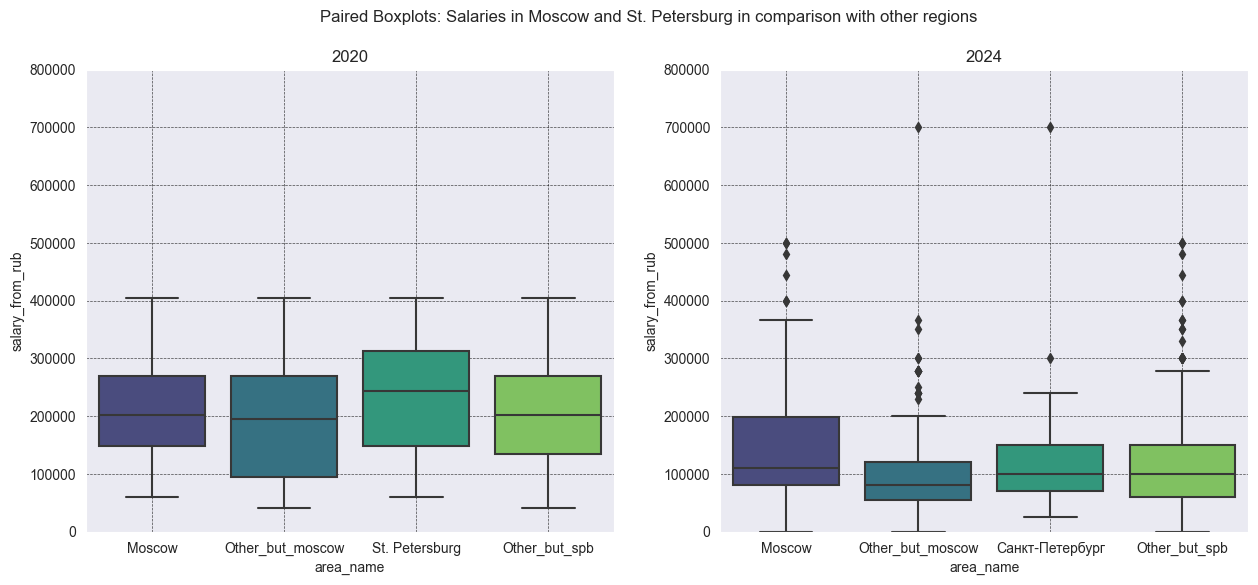

In [65]:
# plot paired boxplots for salaries in Москва and Санкт-Петербург, and areas except Москва, areas except Санкт-Петербург
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

df_moscow_20 = df20[df20['area_name'] == 'Москва']
df_spb_20 = df20[df20['area_name'] == 'Санкт-Петербург']
df_other_but_moscow_20 = df20[df20['area_name'] != 'Москва']
df_other_but_spb_20 = df20[df20['area_name'] != 'Санкт-Петербург']
df_other_but_moscow_20['area_name'] = 'Other_but_moscow'
df_other_but_spb_20['area_name'] = 'Other_but_spb'
df_moscow_20['area_name'] = 'Moscow'
df_spb_20['area_name'] = 'St. Petersburg'

df_moscow_24 = df24[df24['area_name'] == 'Москва']
df_other_but_moscow_24 = df24[df24['area_name'] != 'Москва']
df_other_but_spb_24 = df24[df24['area_name'] != 'Санкт-Петербург']
df_other_but_moscow_24['area_name'] = 'Other_but_moscow'
df_other_but_spb_24['area_name'] = 'Other_but_spb'
df_moscow_24['area_name'] = 'Moscow'

# Make 2 pairplots appear on the same scale
ax[0] = sns.boxplot(x='area_name', y='salary_from_rub', data=pd.concat([df_moscow_20, df_other_but_moscow_20, df_spb_20, df_other_but_spb_20]), ax=ax[0], palette='viridis')
ax[1] = sns.boxplot(x='area_name', y='salary_from_rub', data=pd.concat([df_moscow_24, df_other_but_moscow_24, df_spb_24, df_other_but_spb_24]), ax=ax[1], palette='viridis')
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

ax[0].set_title('2020')
ax[1].set_title('2024')

# Add a title for the entire plot
fig.suptitle('Paired Boxplots: Salaries in Moscow and St. Petersburg in comparison with other regions')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)

plt.show()

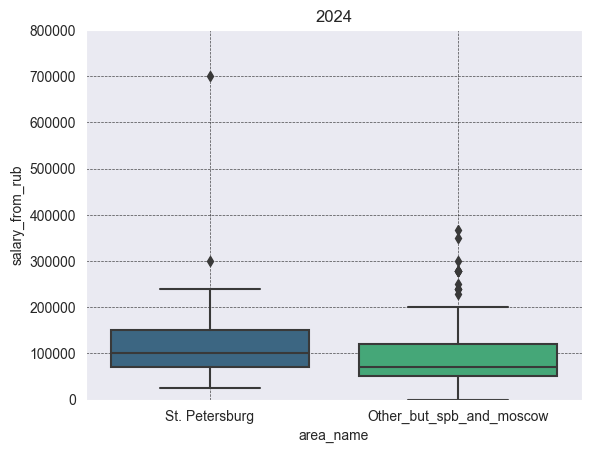

In [68]:
# plot hist for salaries in Санкт-Петербург, and areas except Москва and Санкт-Петербург
import matplotlib.pyplot as plt

sns.boxplot(x='area_name', y='salary_from_rub', data=pd.concat([df_spb_24, df_other_but_spb_and_moscow]), palette='viridis')
plt.title('2024')
plt.ylim(0, 800000)
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
plt.show()

**So we can conclude that in 2020, there is no significant difference in salaries between Moscow, St.Petersburg and other regions, and in 2024, the salaries in Moscow are different from the salaries in other regions, and the salaries in St. Petersburg are different from the salaries in other areas, except Moscow and St. Petersburg.**

In [27]:
# explore for key skills

In [28]:
# print snippet of 7 th vacancy
print(df24['snippet'][7])
# take key skills from the snippet

{'requirement': 'Опыт работы с рекомендательными системами (необязательно прод) от 1 года. Понимания, что под капотом RecSys алгоритмов. Стек технологий: Опыт работы...', 'responsibility': 'Предлагать и проводить эксперименты для решения возникающих задач. Применять различные модели МО для решения задач, интерпретировать результаты <highlighttext>обучения</highlighttext>. '}


We can argue that the percent of vacancies with no experience required has decreased from 2020 to 2024 in favor of vacancies with 1-3 years and 3-6 years of experience.

In [29]:
# hist plot of salaries


## 3. Requirements

What skills are most in demand for Data Science and Machine Learning roles nowadays?

What level of education is required for Data Science jobs and how does it correlate with proposed salaries?